In [1]:
#pip install pyshp

# Questions to Answer 

What is the ideal density of available scooters to: • enable scooters to serve our transportation goals, • discourage scooters piling up on sidewalks, • keep it economically viable for companies to operate equitably in the city?

# Imports

In [2]:
#import libraries 
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np

import gmplot


# Import july Trip Data

In [3]:
#import the CSV
july_trip_df = pd.read_csv('./Data/july_trip.csv')
july_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 16 columns):
pubTimeStamp      134926 non-null object
companyName       134926 non-null object
tripRecordNum     134926 non-null object
sumdID            134926 non-null object
tripDuration      134926 non-null float64
tripDistance      134926 non-null float64
startDate         134926 non-null object
startTime         134926 non-null object
endDate           134926 non-null object
endTime           134926 non-null object
startLatitude     134926 non-null float64
startLongitude    134926 non-null float64
endLatitude       134926 non-null float64
endLongitude      134926 non-null float64
tripRoute         134926 non-null object
create_dt         134926 non-null object
dtypes: float64(6), object(10)
memory usage: 16.5+ MB


In [4]:
july_trip_df.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000


# Import GeoJson for Promise Zones

In [5]:
#adds lines to charts - I think its helpful
%matplotlib inline
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))

#code modified from: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

In [6]:
zone = gpd.read_file('./MDHA_Promise_Zones/Export_Output_5.shp')
zone.head(50)

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812291667 678044.5425000042,..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545416668 661791.3466666639,..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.543750003 668309.8885416687,..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.002708331 654974.6122916639,..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.743958339 692634.6387500018,..."
5,6,6,9.535996e+07,59256.923574,"POLYGON ((1716935.654166669 667534.4950000048,..."


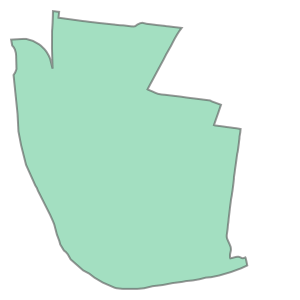

In [7]:
zone.loc[0, 'geometry']

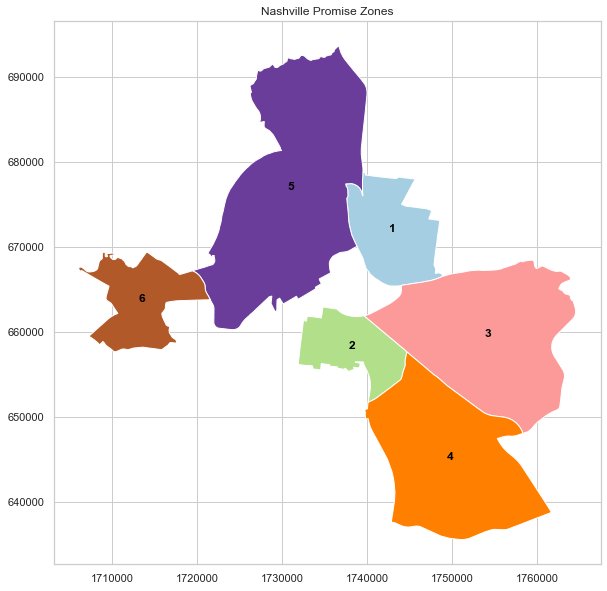

In [8]:
#Mapping and legend

#leg_kwds = {'title': 'Zone', 'loc': 'best', 
#            'bbox_to_anchor': (1, 1), 'ncol': 1}

#zone.plot(column = 'ZONE_ID', figsize=(12, 12), legend = True, legend_kwds = leg_kwds,cmap = 'Set2')
#plt.title('Nashville Promise Zones');
#plt.show()

fig, ax = plt.subplots(figsize = (10,10))
zone.plot(ax = ax, column = 'ZONE_ID', cmap = 'Paired')

for index, row in zone.iterrows():
    plt.annotate(s=row['ZONE_ID'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold', color = 'black')
    
plt.title('Nashville Promise Zones');

# Count of Companies in File

In [9]:
counts_july = july_trip_df['companyName'].value_counts()
print(counts_july)

Bird             44235
Lime             38397
Lyft             28899
SPIN             11685
Bolt Mobility     6759
JUMP              4089
Gotcha             862
Name: companyName, dtype: int64


# Adding Geometry Columns

In [10]:
#Add StartGeometry Column
july_trip_df['startGeometry'] = july_trip_df.apply(lambda x: Point((float(x.startLongitude), float(x.startLatitude))), axis=1)
july_trip_df.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startGeometry
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,POINT (-86.7516 36.1775)
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,POINT (-86.7711 36.1627)
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,POINT (-86.7713 36.1627)
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,POINT (-86.7988 36.1525)
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,POINT (-86.776 36.1578)


In [11]:
#Add EndGeometry Column
july_trip_df['endGeometry'] = july_trip_df.apply(lambda x: Point((float(x.endLongitude), float(x.endLatitude))), axis=1)
july_trip_df.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startGeometry,endGeometry
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,POINT (-86.7516 36.1775),POINT (-86.7514 36.1778)
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000,POINT (-86.7711 36.1627),POINT (-86.7711 36.1627)
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000,POINT (-86.7713 36.1627),POINT (-86.7713 36.1627)
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000,POINT (-86.7988 36.1525),POINT (-86.7988 36.1525)
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,POINT (-86.776 36.1578),POINT (-86.7758 36.1575)


In [12]:
#CSR check
zone.crs


{'init': 'epsg:2274'}

** following code translated from the GeoSpacial class work 'WeGo Bus Stops by District'**

stops = may_trip_df
districts = promise zones

In [13]:
#Joinging two files to one

#original code: districs_stops = gpd.sjoin(stops_geo, districs, op = 'within')
#original code: district stops

#trip_zone = gpd.sjoin(trip_geo, zone, op = 'within')
#trip_zone

# Convert Time & Date Columns to datetime formats

In [14]:
#Convert to Dates
july_trip_df['startDate']=pd.to_datetime(july_trip_df.startDate)
july_trip_df['endDate']=pd.to_datetime(july_trip_df.endDate)
july_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 18 columns):
pubTimeStamp      134926 non-null object
companyName       134926 non-null object
tripRecordNum     134926 non-null object
sumdID            134926 non-null object
tripDuration      134926 non-null float64
tripDistance      134926 non-null float64
startDate         134926 non-null datetime64[ns]
startTime         134926 non-null object
endDate           134926 non-null datetime64[ns]
endTime           134926 non-null object
startLatitude     134926 non-null float64
startLongitude    134926 non-null float64
endLatitude       134926 non-null float64
endLongitude      134926 non-null float64
tripRoute         134926 non-null object
create_dt         134926 non-null object
startGeometry     134926 non-null object
endGeometry       134926 non-null object
dtypes: datetime64[ns](2), float64(6), object(10)
memory usage: 18.5+ MB


In [15]:
#Convert to Times
july_trip_df['startTime']=pd.to_datetime(july_trip_df.startTime)
july_trip_df['endTime']=pd.to_datetime(july_trip_df.endTime)
july_trip_df['pubTimeStamp']=pd.to_datetime(july_trip_df.pubTimeStamp)
july_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 18 columns):
pubTimeStamp      134926 non-null datetime64[ns]
companyName       134926 non-null object
tripRecordNum     134926 non-null object
sumdID            134926 non-null object
tripDuration      134926 non-null float64
tripDistance      134926 non-null float64
startDate         134926 non-null datetime64[ns]
startTime         134926 non-null datetime64[ns]
endDate           134926 non-null datetime64[ns]
endTime           134926 non-null datetime64[ns]
startLatitude     134926 non-null float64
startLongitude    134926 non-null float64
endLatitude       134926 non-null float64
endLongitude      134926 non-null float64
tripRoute         134926 non-null object
create_dt         134926 non-null object
startGeometry     134926 non-null object
endGeometry       134926 non-null object
dtypes: datetime64[ns](5), float64(6), object(7)
memory usage: 18.5+ MB


# Save File

In [16]:
#save to CSV
july_trip_df.to_csv('Data/july_trip_geo.csv', index = False)

# Stats based on Days of Week, Hours of Day

In [17]:
#Total Trips by Day
july_trips_day = july_trip_df.groupby(july_trip_df['startDate'].dt.dayofweek).count().startTime

print(july_trips_day)

startDate
0    16875
1    14600
2    14835
3    15367
4    22325
5    30165
6    20759
Name: startTime, dtype: int64


Text(0, 0.5, 'Number of rides')

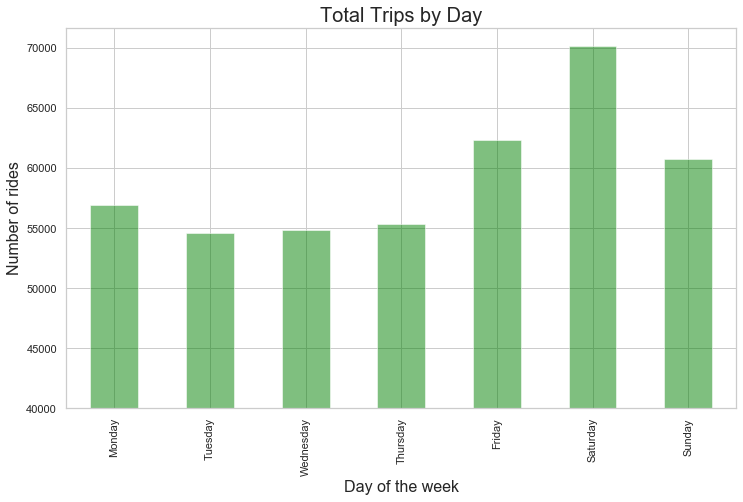

In [18]:
# Number of scooter per day of the week
july_trip_day = july_trip_df.groupby(july_trip_df['startDate'].dt.dayofweek).count().startDate

# Replace the day integers by day names.
july_trip_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = july_trip_day.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Total Trips by Day', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of rides',fontsize=16)


Text(0, 0.5, 'Number of rides')

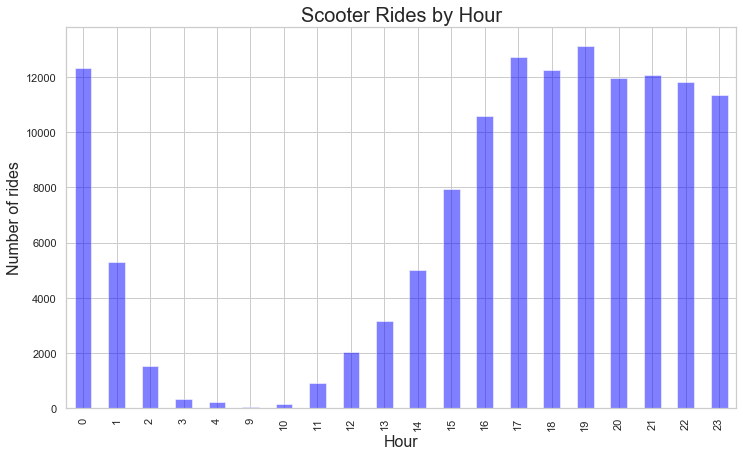

In [19]:
# Number of trips per hour
july_trip_hour = july_trip_df.groupby(july_trip_df['startTime'].dt.hour).count().startTime

# plot trips per hour
july_trip_hour.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5, bottom = 0)

# title and x,y labels
plt.title('Scooter Rides by Hour', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of rides',fontsize=16)



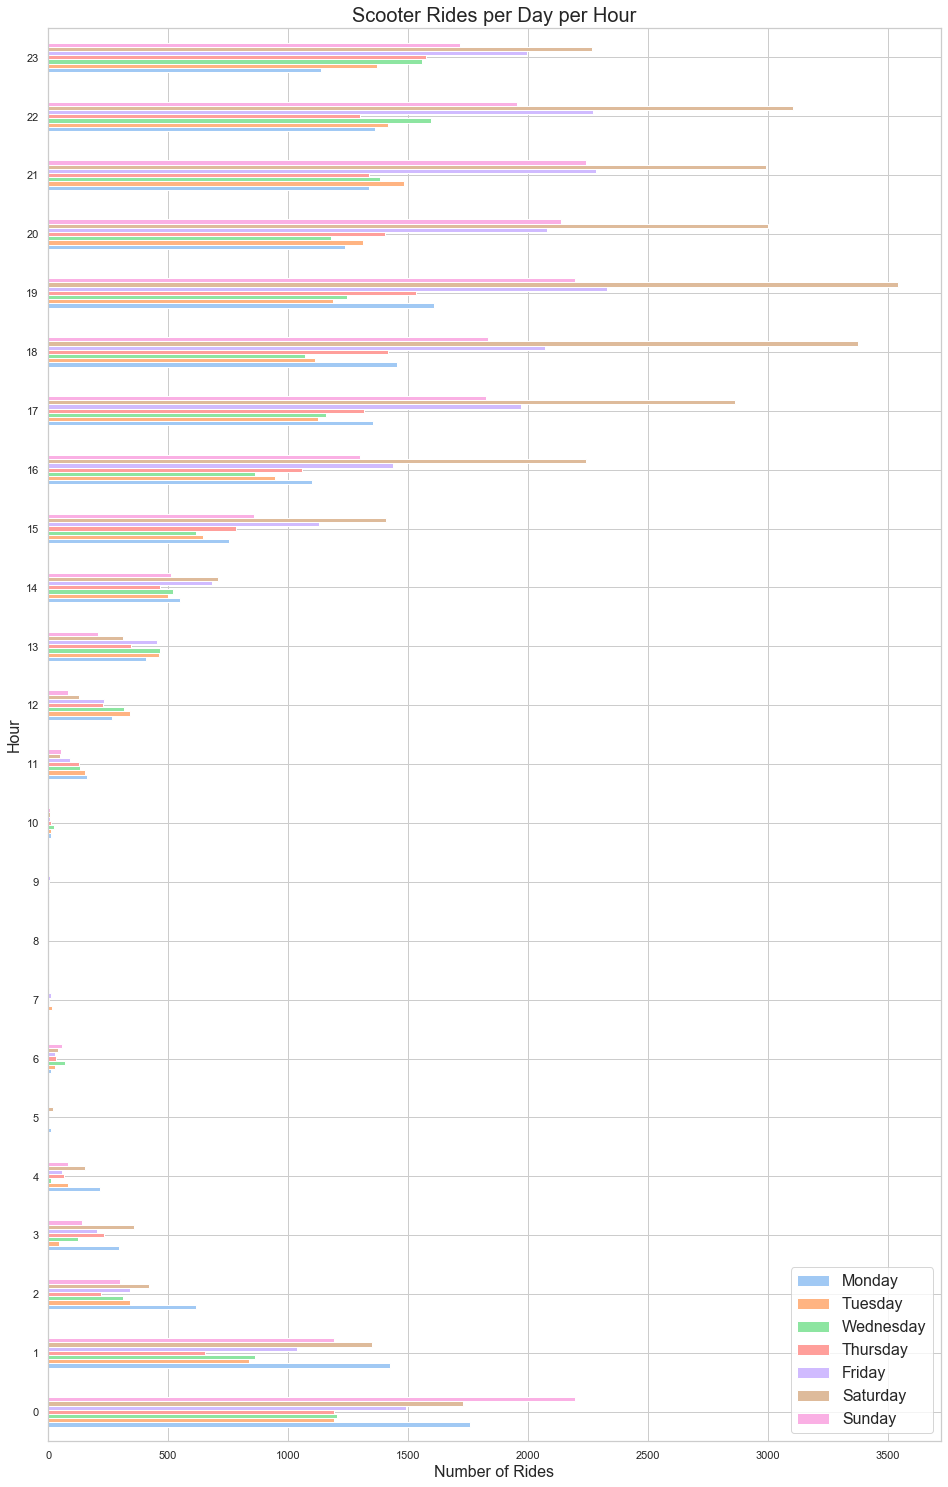

In [20]:
# Number of  Trips per hour and day
trips_hour_day = july_trip_df.groupby([july_trip_df['pubTimeStamp'].dt.hour.rename('hour'),july_trip_df['pubTimeStamp'].dt.dayofweek.rename('day')]).count().pubTimeStamp

trips_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Scooter Rides per Day per Hour',fontsize=20)
plt.xlabel('Number of Rides',fontsize=16)
plt.ylabel('Hour',fontsize=16);

# Number of Rides per Scooter

In [21]:
#Count of rides on each scooter
counts_scooters = july_trip_df['sumdID'].value_counts()
print(counts_scooters)

PoweredUNKNOWN                                 327
Powered5N5J5BJDODHYX                           141
PoweredOEHCPCAUHESR5                           134
PoweredIHGSNSRXCZ2ZG                           128
Powered5BW4GPYGBMUTL                           126
Powered7FV7FFP2MV66S                           125
PoweredMKPBZS2PEITKN                           123
Powered25WTY4ODS5QZ7                           123
PoweredPAVHVTUPMTOOG                           121
PoweredMWA2NEKTFGT6H                           121
PoweredLAXX65AIGQ27Q                           119
PoweredFE7MM22M6BBJV                           119
PoweredTBGIRQ5IOW2KR                           119
PoweredVW4PNNV3UKVWX                           118
PoweredTN6NH2B55D7TI                           117
PoweredSMG5U52YHYNGL                           116
PoweredC373KUYMR64SA                           116
PoweredTUYG2UYJLVFQE                           116
PoweredHNVQAAX6ZNBXF                           115
PoweredVMGURJPXEXEOF           

# Count Number of Rides per Day

In [22]:
#Count of rides on each scooter
counts_startDate = july_trip_df['startDate'].value_counts()
print(counts_startDate)

2019-07-06    8055
2019-07-13    7981
2019-07-05    7839
2019-07-27    7398
2019-07-20    6731
2019-07-14    5922
2019-07-04    5521
2019-07-28    5373
2019-07-19    4923
2019-07-26    4917
2019-07-07    4774
2019-07-21    4690
2019-07-12    4646
2019-07-01    4320
2019-07-29    3644
2019-07-25    3434
2019-07-03    3375
2019-07-18    3322
2019-07-15    3231
2019-07-30    3217
2019-07-02    3124
2019-07-31    3111
2019-07-11    3090
2019-07-17    3049
2019-07-24    2935
2019-07-16    2875
2019-07-22    2869
2019-07-23    2834
2019-07-08    2811
2019-07-09    2550
2019-07-10    2365
Name: startDate, dtype: int64


Several entries show trips where a beginning point and end point are the same. Due to this, trips without a change in geography will be considered inactive.

# Filtering DataFrame to Only Active Scooters 

In [23]:
#creating an alternative df to later edit
active_df = july_trip_df

In [24]:
#populate the Low Rides df based on the a specified date
    
#for index, row in active_df.iterrows():
#    if row['startGeometry'] == row['endGeometry']:
#       active_df.drop(index, inplace=True)
    
#active_df.startgeometry.value_count()

In [25]:
#filter down to trips where distance was recorded
active_df = active_df[active_df.startGeometry != active_df.endGeometry]
active_df.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startGeometry,endGeometry
0,2019-07-01 00:02:52.213,Bird,BRD5179,PoweredZSHKJ,2.000000,0.00000,2019-07-01,2019-09-17 00:01:32.290000,2019-07-01,2019-09-17 00:03:55.966666,36.17750,-86.7516,36.17780,-86.75140,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000,POINT (-86.7516 36.1775),POINT (-86.7514 36.1778)
4,2019-07-01 00:02:52.213,Bird,BRD5180,PoweredW4G7R,2.000000,0.00000,2019-07-01,2019-09-17 00:01:19.843333,2019-07-01,2019-09-17 00:02:53.976666,36.15780,-86.7760,36.15750,-86.77580,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000,POINT (-86.776 36.1578),POINT (-86.7758 36.1575)
5,2019-07-01 00:03:52.060,Lyft,LFT7,Powered840423,3.716183,2375.32816,2019-07-01,2019-09-17 00:00:08.963333,2019-07-01,2019-09-17 00:03:51.933333,36.14933,-86.7976,36.15265,-86.79706,"[[36.14933,-86.7976],[36.14942,-86.7975],[36.1...",2019-07-02 09:34:36.953000,POINT (-86.7976 36.14933),POINT (-86.79706 36.15265)
8,2019-07-01 00:07:52.227,Bird,BRD5235,PoweredNAEY4,7.000000,0.00000,2019-07-01,2019-09-17 00:02:15.840000,2019-07-01,2019-09-17 00:08:54.896666,36.15550,-86.7798,36.15560,-86.77980,"[[36.155573,-86.779769],[36.155507,-86.779862]...",2019-07-02 05:30:18.943000,POINT (-86.77979999999999 36.1555),POINT (-86.77979999999999 36.1556)
9,2019-07-01 00:07:52.227,Bird,BRD5232,PoweredIIIS8,3.000000,0.00000,2019-07-01,2019-09-17 00:06:23.883333,2019-07-01,2019-09-17 00:09:47.840000,36.15990,-86.7766,36.16040,-86.77540,"[[36.159913,-86.776636],[36.159995,-86.776585]...",2019-07-02 05:30:18.853000,POINT (-86.7766 36.1599),POINT (-86.7754 36.1604)


# Remove trips over 24 hrs. 

In [26]:
#filter previous list to those under 24 hour trips
active_df = active_df[active_df.tripDuration <= 1440.0000]

In [27]:
# Count of rides meeting 24hrs or less 
counts_co1 = active_df['companyName'].value_counts()
counts_co1

Bird             41476
Lime             37527
Lyft             28817
SPIN             11259
Bolt Mobility     4252
JUMP              3983
Gotcha             860
Name: companyName, dtype: int64

# Remove trips under 1 minute

In [28]:
#filter previous list to those under 1 minute 
active_df = active_df[active_df.tripDuration >= 1.0000]

In [45]:
counts_co2 = active_df['companyName'].value_counts()
counts_co2

Lime             35692
Lyft             27623
Bird             20334
SPIN             11224
Bolt Mobility     4217
JUMP              3918
Gotcha             827
Name: companyName, dtype: int64

# Filter the Active DataFrame to Those Traveled 3 Meters or More

In [46]:
#filter down the previously filtered list to trips that traveled 3 meters or more

#file provides distance in feet. 1 meter = 3.2 feet
#active_df = active_df[active_df.tripDistance >= 9.83]

In [47]:
active_df.tail(1)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startGeometry,endGeometry
134925,2019-08-01 07:04:00,JUMP,JMP34,Powered784fcc92-bd1a-5f6a-8314-b02aa21b4bfa,209.40965,14889.6,2019-07-31,2019-09-17 22:19:08,2019-08-01,2019-09-17 01:48:33,36.16005,-86.77672,36.16341,-86.7821,"[[""36.160051"",""-86.77672""],[""36.160051"",""-86.7...",2019-08-02 08:24:22,POINT (-86.77672 36.16005),POINT (-86.7821 36.16341)


# Filtering to Scooters w/ 90 trips per month (by DSpau)

In [32]:
#making list of scooter ids and times appeared.
Group1 = active_df.groupby(active_df.sumdID.tolist(),as_index=False).size()
print(Group1)

Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619    20
Powered-01a24436-0315-e1bb-7ce0-d081d05dff7d     4
Powered-03be23ca-d43b-222f-be54-e44b5b4690df    17
Powered-046201fb-6532-1f37-6334-3612fb1e61f7    16
Powered-0479bb84-afbd-0426-f1c4-df628542a88c    16
Powered-0540c92c-0907-dafa-b19f-011495068ec5    19
Powered-0555d61d-1c59-4219-edf3-0f00e286629a    26
Powered-05fedb39-a00f-a5e0-2219-8c3c7dd1b80e    23
Powered-079ce993-98bd-417a-acfe-76e2861ebf9b    16
Powered-08505f68-1f44-5d79-48c5-1370977e40d5    27
Powered-09c75f98-6492-9d35-12e4-c5649cebf403    16
Powered-0a8e2ca5-5eae-511e-ef0d-74d582fa8cee     9
Powered-0ac70fa5-9f26-e69b-ca7a-9803d2aa1535    12
Powered-0b4a127c-3c2a-a917-cbf4-ccb17b8604f6     6
Powered-0e3d7343-0a27-2854-2dbc-23166bea8c8c     1
Powered-0e66b4be-c897-5140-f34c-b78d3beea648    15
Powered-0ef64718-9c36-353e-8bf0-39719364d924    17
Powered-0f344f74-7253-b66b-31b5-ea11fc0434a9    13
Powered-10dcc81d-01cf-b97f-add7-ad411f04b248     3
Powered-112d666d-debc-1f39-8cb8

In [33]:
Group1.to_csv('./Data/july_Active_Trip_Counter.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [34]:
col_Names=["sumdID", "Trips"]
Group3CSV= pd.read_csv("./Data/july_Active_Trip_Counter.csv",names=col_Names)

In [35]:
Group3CSV

,sumdID,Trips
0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,20
1,Powered-01a24436-0315-e1bb-7ce0-d081d05dff7d,4
2,Powered-03be23ca-d43b-222f-be54-e44b5b4690df,17
3,Powered-046201fb-6532-1f37-6334-3612fb1e61f7,16
4,Powered-0479bb84-afbd-0426-f1c4-df628542a88c,16
5,Powered-0540c92c-0907-dafa-b19f-011495068ec5,19
6,Powered-0555d61d-1c59-4219-edf3-0f00e286629a,26
7,Powered-05fedb39-a00f-a5e0-2219-8c3c7dd1b80e,23
8,Powered-079ce993-98bd-417a-acfe-76e2861ebf9b,16
9,Powered-08505f68-1f44-5d79-48c5-1370977e40d5,27


In [36]:
#filtering down the previously filtered database to those that could have been riden3 times a day.
Trips_df = Group3CSV[Group3CSV.Trips >= 90]

In [37]:
Trips_df

,sumdID,Trips
804,Powered25WTY4ODS5QZ7,113
908,Powered2J6U5WZAGIGQD,94
941,Powered2UOBTBJ3PG3YV,99
1119,Powered36KKJD2IQ656A,96
1247,Powered3YI3UZR3YQTLX,92
1782,Powered5BW4GPYGBMUTL,114
1794,Powered5EO42TWU4SMVB,101
1809,Powered5N5J5BJDODHYX,102
1818,Powered5QBZSLFMLMLQU,90
1832,Powered5WZL7FHK2SJ6C,91


In [38]:
#Most Used Scooter:
A = Trips_df.Trips.max()
B = Trips_df.sumdID.max()

print(A)
print(B)

125
PoweredZJJPGS7XLOFBQ


In [39]:
Most_Used = Trips_df[Trips_df.Trips == 125]
Most_Used

,sumdID,Trips
3678,PoweredIHGSNSRXCZ2ZG,125


In [40]:
FilteredTrips = active_df[active_df['sumdID'].isin(Trips_df.sumdID)]
FilteredTrips

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startGeometry,endGeometry
236,2019-07-01 00:54:49.507,Lime,LIM784847,PoweredVPBLRG7IZBSFP,11.0,6238.941099,2019-07-01,2019-09-17 00:04:43,2019-07-01,2019-09-17 00:15:17,36.152375,-86.791196,36.152774,-86.790046,"[[36.15237,-86.7912],[36.15239,-86.79127],[36....",2019-07-02 08:43:38.383000,POINT (-86.791196 36.152375),POINT (-86.790046 36.152774)
244,2019-07-01 00:54:49.537,Lime,LIM784854,Powered6Z6YVT6VEHE2U,6.0,3395.106543,2019-07-01,2019-09-17 00:11:07,2019-07-01,2019-09-17 00:17:11,36.160080,-86.781225,36.155979,-86.785845,"[[36.16008,-86.78122],[36.16021,-86.78129],[36...",2019-07-02 08:43:38.603000,POINT (-86.78122500000001 36.16008),POINT (-86.78584499999999 36.155979)
245,2019-07-01 00:54:49.547,Lime,LIM784855,PoweredMJYTSRKL7J3UW,13.0,6221.929540,2019-07-01,2019-09-17 00:05:07,2019-07-01,2019-09-17 00:18:15,36.167997,-86.782963,36.159070,-86.782053,"[[36.168,-86.78296],[36.16803,-86.78296],[36.1...",2019-07-02 08:43:38.640000,POINT (-86.782963 36.167997),POINT (-86.782053 36.15907)
252,2019-07-01 00:54:49.583,Lime,LIM784862,PoweredL2ZV3NHLAPRIL,16.0,11798.791878,2019-07-01,2019-09-17 00:05:57,2019-07-01,2019-09-17 00:21:34,36.130163,-86.801954,36.151717,-86.780480,"[[36.13195,-86.80159],[36.134020000000007,-86....",2019-07-02 08:43:38.857000,POINT (-86.80195399999999 36.130163),POINT (-86.78048 36.151717)
254,2019-07-01 00:54:49.583,Lime,LIM784863,Powered7FV7FFP2MV66S,14.0,7579.525331,2019-07-01,2019-09-17 00:08:16,2019-07-01,2019-09-17 00:22:00,36.159990,-86.776570,36.180225,-86.788877,"[[36.16167,-86.77927],[36.16267,-86.7801499999...",2019-07-02 08:43:38.890000,POINT (-86.77657000000001 36.15999),POINT (-86.788877 36.180225)
552,2019-07-01 01:54:50.040,Lime,LIM784884,PoweredL2ZV3NHLAPRIL,6.0,2817.268738,2019-07-01,2019-09-17 00:24:55,2019-07-01,2019-09-17 00:30:30,36.151566,-86.780498,36.151357,-86.787438,"[[36.15157,-86.7805],[36.15173,-86.78038000000...",2019-07-02 08:43:42,POINT (-86.78049799999999 36.151566),POINT (-86.78743799999999 36.151357)
556,2019-07-01 01:54:50.053,Lime,LIM784890,Powered2J6U5WZAGIGQD,8.0,2090.419000,2019-07-01,2019-09-17 00:26:10,2019-07-01,2019-09-17 00:34:06,36.128523,-86.777752,36.130869,-86.778795,"[[36.12851,-86.77818],[36.1324,-86.77944000000...",2019-07-02 08:43:42.213000,POINT (-86.77775200000001 36.128523),POINT (-86.778795 36.130869)
570,2019-07-01 01:54:50.090,Lime,LIM784905,Powered7FV7FFP2MV66S,3.0,1955.083060,2019-07-01,2019-09-17 00:40:35,2019-07-01,2019-09-17 00:43:46,36.179971,-86.788934,36.177566,-86.784905,"[[36.17997,-86.78893],[36.180009999999996,-86....",2019-07-02 08:43:42.750000,POINT (-86.788934 36.179971),POINT (-86.78490499999999 36.177566)
575,2019-07-01 01:54:50.110,Lime,LIM784911,Powered3YI3UZR3YQTLX,12.0,5565.943502,2019-07-01,2019-09-17 00:32:49,2019-07-01,2019-09-17 00:44:21,36.149747,-86.814384,36.149671,-86.814216,"[[36.14975,-86.81438],[36.149789999999996,-86....",2019-07-02 08:43:42.963000,POINT (-86.814384 36.149747),POINT (-86.814216 36.149671)
578,2019-07-01 01:54:50.117,Lime,LIM784912,PoweredLRAXWZSZ5DGEV,4.0,2074.260119,2019-07-01,2019-09-17 00:40:13,2019-07-01,2019-09-17 00:44:36,36.150589,-86.795160,36.153009,-86.789157,"[[36.15071,-86.79546],[36.1515,-86.79452],[36....",2019-07-02 08:43:43.033000,POINT (-86.79516 36.150589),POINT (-86.789157 36.153009)


In [41]:
counts_co1 = FilteredTrips['companyName'].value_counts()
print(counts_co1)

Lime    8013
Name: companyName, dtype: int64


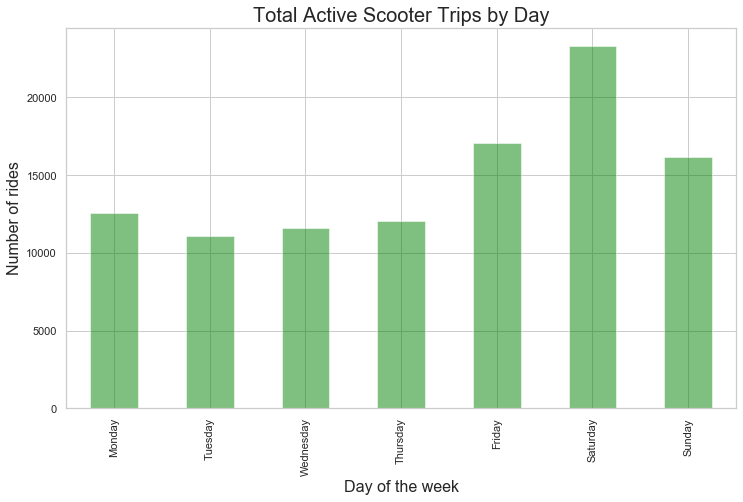

In [42]:
# Number of scooter per day of the week
july_active = active_df.groupby(active_df['startDate'].dt.dayofweek).count().startDate

# Replace the day integers by day names.
july_active.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
july_active.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 0)

# title and x,y labels
plt.title('Total Active Scooter Trips by Day', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of rides',fontsize=16);

# JUMP Scooter w/ excessive rides data

In [43]:
#view JUMP scooter w/ 600 rides
JUMP_july = FilteredTrips[FilteredTrips.sumdID == 'Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2']
JUMP_july

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,startGeometry,endGeometry


In [44]:
# Number of  Trips per hour and day - Jump Scooter
trips_hour_day1 = JUMP_july.groupby([JUMP_july['pubTimeStamp'].dt.hour.rename('hour'),JUMP_july['pubTimeStamp'].dt.dayofweek.rename('day')]).count().pubTimeStamp

trips_hour_day1.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=12)
plt.title('Scooter Rides per Day per Hour',fontsize=20)
plt.xlabel('Number of Rides',fontsize=16)
plt.ylabel('Hour',fontsize=16);

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
Rides = JUMP_july.groupby(JUMP_july['pubTimeStamp'].dt.date).count().pubTimeStamp
Rides

In [ ]:
Rides.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)
plt.ylabel('total scooter rides', fontsize=12)
plt.xlabel ('date', fontsize=12)

In [ ]:
#JUMP_5_17 = JUMP_july[JUMP_May.startDate == '2019-05-17']


#save to CSV
#JUMP_5_17.to_csv('Data/JUMP_May5_17.csv', index = False)

In [ ]:
#JUMP_5_17


In [ ]:
#JUMP_5_17 = JUMP_May[JUMP_May.startDate == '2019-05-17']

In [ ]:
#JUMP_May.info()

# Subsetting to specific time frame

In [ ]:
#Jump_Time = JUMP_5_17[(JUMP_5_17.startTime >= '2019-09-12 04:00:00') & (JUMP_5_17.startTime <= '2019-09-12 04:15:00')]
#Jump_Time['geo'] = JUMP_5_17.apply(lambda x: list((float(x.startLatitude), float(x.startLongitude))), axis=1)
#for i in Jump_Time['geo']:
 #   print(i[0], i[1])

In [ ]:
starts = Jump_Time


In [ ]:
#locations = starts[['startLatitude', 'startLongitude']]
#locationlist = locations.values.tolist()
#len(locationlist)
#locationlist[1]

In [ ]:
#nashv_map = folium.Map(location=[36.174465, -86.767960], zoom_start=12)
#for point in range(0, len(locationlist)):
 #   folium.Marker(locationlist[point], popup=starts['sumdID'][point]).add_to(nashv_map)
#nashv_map

# Mapping

In [ ]:
#create our map of Antioch and show it
#map_nash = folium.Map(location=[36.174465, -86.767960], zoom_start=12)
#map_nash

In [ ]:

#JUMP = gpd.GeoDataFrame(Jump_Time, geometry = 'startGeometry')


#JUMPS.to_file("./Data/JUMP_5_17.geojson", driver='GeoJSON')

In [ ]:
#for geo in Jump_Time['geo']:
#   folium.features.Circle([geo[1], geo[0]], radius=4, color='darkslateblue', opacity=0.5).add_to(map_nash)

#map_nash

In [ ]:
#draw our neighborhood: Urban Residents

#nashville_map = folium.Map(location=[36.174465, -86.767960], zoom_start=12)

#folium.GeoJson(JUMP[['startGeometry']].to_json())

#points = folium.features.GeoJson(JUMP[['startGeometry']].to_json())
#ends = folium.features.GeoJson(JUMPS[['endGeometry']].to_json())

#nashville_map.add_child(points) 

#nashville_map


nashville_map = folium.Map(location=[36.174465, -86.767960], zoom_start=12)


for geo in Jump_Time['geo']:
    folium.features.Circle([geo[1], geo[0]],
                               radius=4,
                               color='darkslateblue',
                               opacity=0.5
                               ).add_to(nashville_map)


nashville_map

# Spare Code

HeatMap code:

Nashville_map = folium.Map(location=[36.1619178,-86.8213942], zoom_start=12)

hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(bolt_july_df.latitude,bolt_july_df.longitude,bolt_july_df.pubdatetime.dt.hour):
    hour_list[hour].append([lat,log]) 


index = [str(i)+' Hours' for i in range(24)]


HeatMapWithTime(hour_list, index).add_to(Nashville_map)

Nashville_map